## Regression with an Abalone Dataset

**Task**: Predcit the number of Rings on Abalone shells  
**Dataset**: Provided training and test dataset with features similar to the original Dataset  
**Objective**: Develop a machine learning model to accuratelyu predict the number of rings on the shell  
**Exploration**: Explore featre distribution and potential diffrence between provided dataset and original Dataset  
**Evaluation**: submissions will be evaluated based on accuracy

$$\textbf{Evaluation metric- Root Mean Squared Logarithmic Error} \\
\\
\text{RMSLE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (\log(p_i + 1) - \log(y_i+1))^2}

$$

### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")
df_sub=pd.read_csv("sample_submission.csv")

In [4]:
df_train.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [5]:
df_train.tail()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
90610,90610,M,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,6
90611,90611,M,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,9
90612,90612,I,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,6
90613,90613,I,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700,6
90614,90614,I,0.425,0.325,0.100,0.3455,0.1525,0.0785,0.1050,8


In [8]:
df_test.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [9]:
df_sub.head()

,id,Rings
0,90615,10
1,90616,10
2,90617,10
3,90618,10
4,90619,10


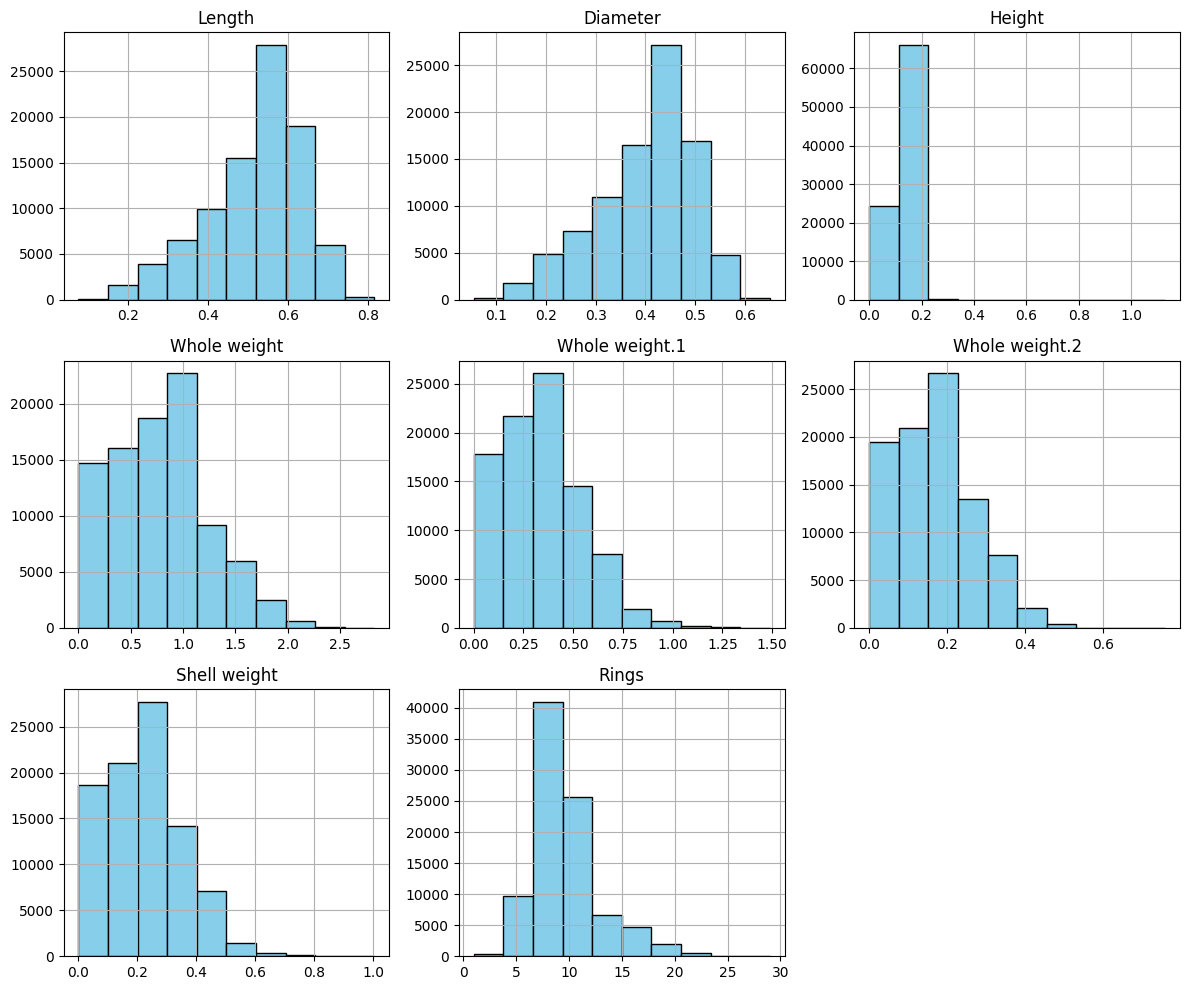

In [13]:
df_train.drop(labels='id',axis=1).hist(figsize=(12,10),color='skyblue',edgecolor='black')
plt.tight_layout()
plt.show()

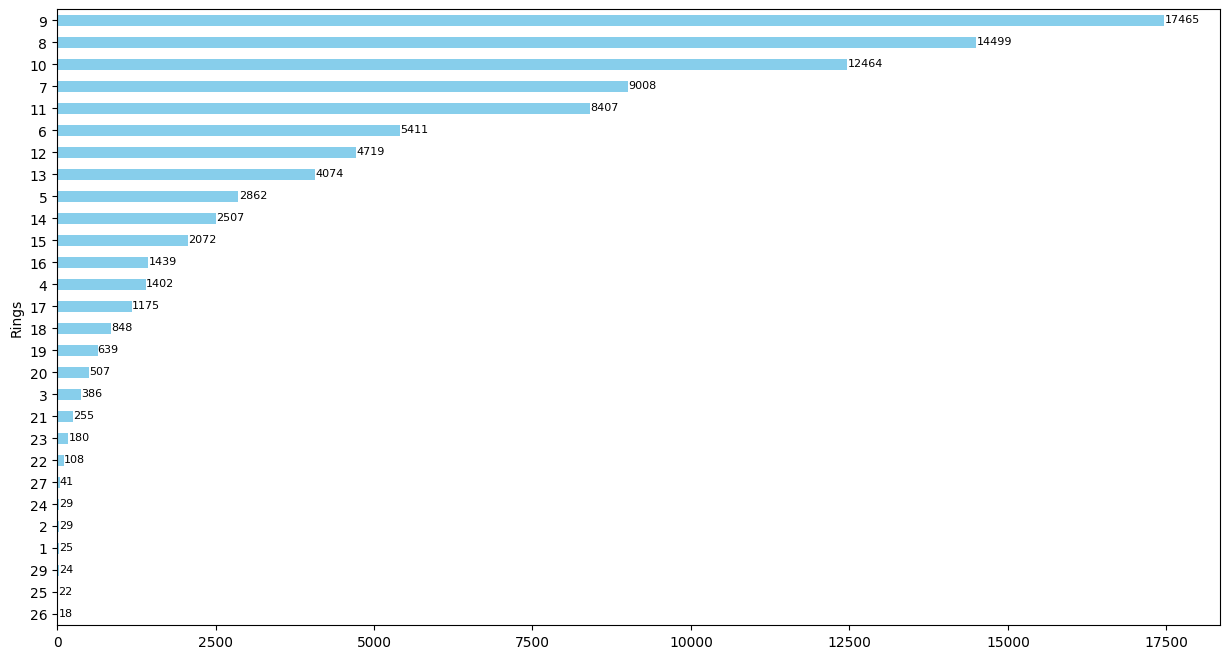

In [58]:
ax = df_train['Rings'].value_counts(ascending=True).plot(kind='barh', color='skyblue', edgecolor=None, figsize=(15,8))
for i, v in enumerate(df_train['Rings'].value_counts(ascending=True)):
    ax.text(v + 3, i-0.089, str(v), color='black',fontsize='8')

    # ax.text(x,y,value,color,fontsize)

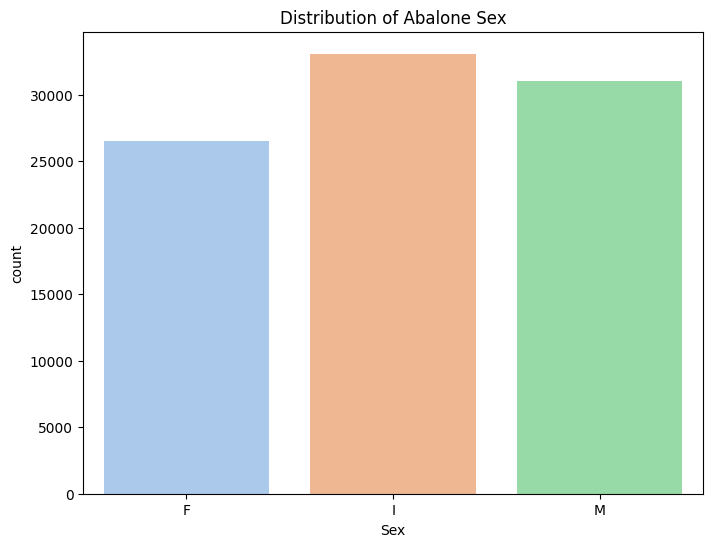

In [67]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_train,x='Sex',hue='Sex',palette='pastel')
plt.title("Distribution of Abalone Sex")
plt.show()


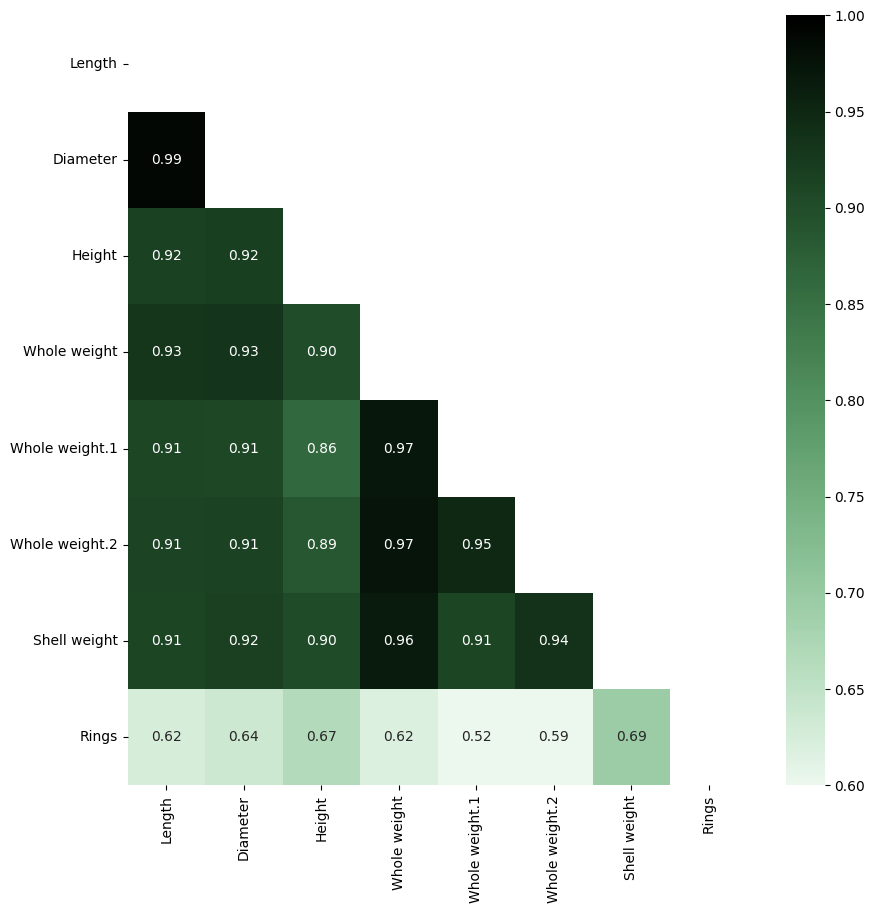

In [86]:
corr_matrix=df_train.drop(labels=['id','Sex'],axis=1).corr()

plt.figure(figsize=(10,10))
sns.heatmap(data=corr_matrix,cmap=sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=False, as_cmap=True),annot=True,fmt='.2f',mask=np.triu(corr_matrix),vmin=0.6,vmax=1.0)
plt.show()

In [ ]:
df_train.drop(labels='id',axis=1,inplace=True)

In [139]:
import warnings
warnings.filterwarnings('ignore')

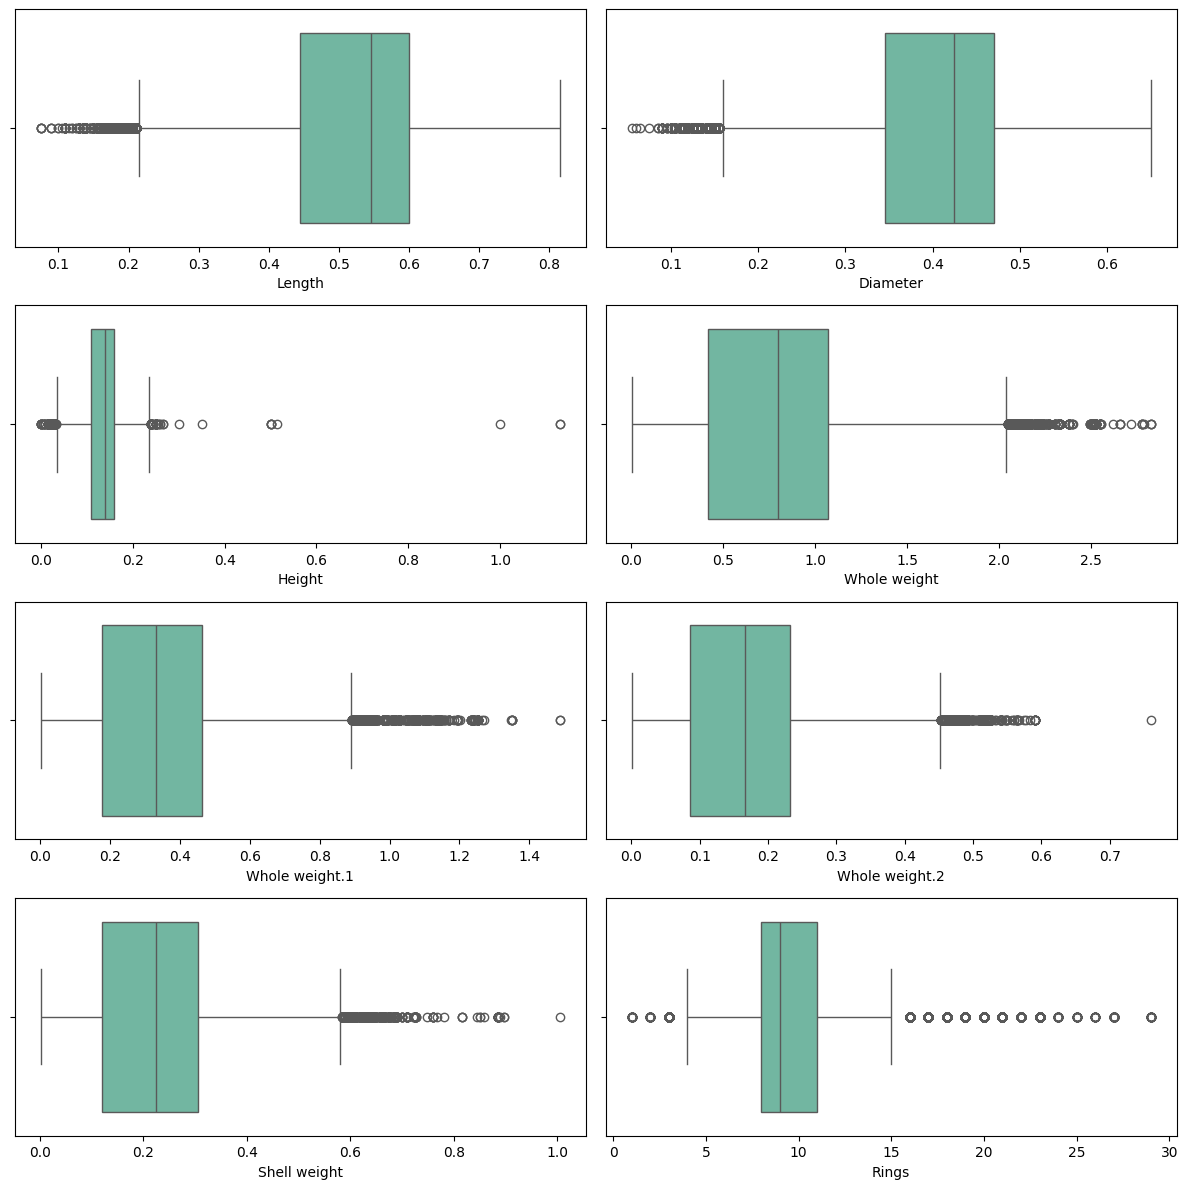

In [142]:
def show_boxplots(labels,df):

    fig,axes=plt.subplots(nrows=int(np.ceil(len(labels)/2)),ncols=2,figsize=(6*2,3*np.int(np.ceil(len(labels)/2))))

    for i,ax in enumerate(axes.flat):
        sns.boxplot(data=df[labels[i]],orient='h',legend=False,ax=ax,palette='Set2')
        ax.set_xlabel(labels[i])
    fig.tight_layout()
show_boxplots(df_train.columns[1:],df_train)

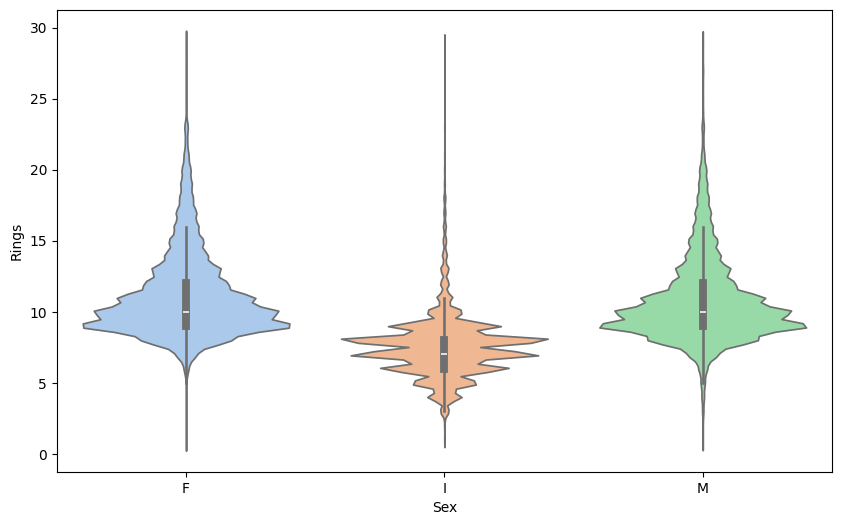

In [146]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df_train,x="Sex",y="Rings",palette='pastel')
plt.show()

In [149]:
from sklearn.preprocessing import LabelEncoder
combined_data=pd.concat([df_train,df_test])
label_encoder=LabelEncoder()
combined_data['Sex_encoded']=label_encoder.fit_transform(combined_data["Sex"])
df_train["Sex_encoded"]=combined_data["Sex_encoded"][:len(df_train)]
df_test["Sex_encoded"]=combined_data["Sex_encoded"][len(df_train):]

if "id" in df_train.columns:
    df_train.drop(columns=["id"],inplace=True)
df_test.drop(columns=["id"],inplace=True)


In [150]:
df_train.drop(columns=["Sex"],inplace=True)
df_test.drop(columns=["Sex"],inplace=True)


In [152]:
y=df_train["Rings"]
X=df_train.drop(columns=["Rings"],axis=1)


In [153]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [154]:
cat_model=CatBoostRegressor(iterations=500,
                            learning_rate=0.05,
                            depth=10,
                            eval_metric="RMSE",
                            random_state=42,
                            bagging_temperature=0.2,
                            od_type="Iter",
                            metric_period=50,
                            od_wait=20)

In [157]:
cat_model.fit(X_train,y_train,
              eval_set=(X_test,y_test),
              use_best_model=True,
              verbose=50)


0:	learn: 3.0812084	test: 3.1176021	best: 3.1176021 (0)	total: 134ms	remaining: 1m 7s
50:	learn: 1.9297376	test: 1.9834569	best: 1.9834569 (50)	total: 2.14s	remaining: 18.8s
100:	learn: 1.8597728	test: 1.9250154	best: 1.9250154 (100)	total: 3.92s	remaining: 15.5s
150:	learn: 1.8263340	test: 1.9054256	best: 1.9054256 (150)	total: 5.79s	remaining: 13.4s
200:	learn: 1.8024370	test: 1.8955077	best: 1.8955077 (200)	total: 7.8s	remaining: 11.6s
250:	learn: 1.7800739	test: 1.8884342	best: 1.8884116 (249)	total: 10.3s	remaining: 10.2s
300:	learn: 1.7577918	test: 1.8825935	best: 1.8825935 (300)	total: 12.2s	remaining: 8.06s
350:	learn: 1.7368996	test: 1.8787215	best: 1.8787215 (350)	total: 14s	remaining: 5.94s
400:	learn: 1.7199362	test: 1.8749973	best: 1.8749973 (400)	total: 15.8s	remaining: 3.89s
450:	learn: 1.7007927	test: 1.8724832	best: 1.8724832 (450)	total: 17.6s	remaining: 1.92s
499:	learn: 1.6846600	test: 1.8703653	best: 1.8703653 (499)	total: 19.4s	remaining: 0us

bestTest = 1.8703652

In [158]:
pred_test=cat_model.predict(df_test)

In [159]:
pred_test

array([ 9.69659134,  9.76367354, 10.17499761, ..., 11.62879317,
       13.42847537,  9.05810873])

In [160]:
df_sub.head()

,id,Rings
0,90615,10
1,90616,10
2,90617,10
3,90618,10
4,90619,10


In [163]:
df_sub["Rings"]=pred_test
df_sub.to_csv('submission.csv',index=False)